# <span style="color:midnightblue"> **Análisis Estadístico Multivariable – Primavera 2025**</span>

Prof. Luis Alvarado

Clara Paola Aguilar Casillas

Daniela de la Torre Gallo

Aissa Berenice Gonzalez Fosado

<img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png"  width="400">

# <span style="color:midnightblue"> **Proyecto de Clasificación: *Recurrencia del cáncer diferenciado de tiroides***</span>


### **Dataset**



Este conjunto de datos contiene 13 características clinicopatológicas destinadas a predecir la recurrencia del cáncer de tiroides bien diferenciado. Se recopiló durante 15 años y se realizó un seguimiento de cada paciente durante al menos 10 años.

**Fuente del Dataset:**

Borzooei, S. & Tarokhian, A. (2023). Differentiated Thyroid Cancer Recurrence [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J.

**Variables**

Age: Representa la edad de los individuos en el conjunto de datos.

Gender: Indica el género de los individuos.

Smoking: Posiblemente un atributo relacionado con el hábito tabáquico. Los valores o categorías específicos requieren mayor análisis.

Hx Smoking: Indica si los individuos tienen antecedentes de tabaquismo.

Hx Radiotherapy: Indica si los individuos tienen antecedentes de tratamiento con radioterapia (p. ej., sí o no).

Thyroid Function: Posiblemente indica el estado o la función de la glándula tiroides.

Physical Examination: Describe los resultados de un examen físico, probablemente relacionado con la tiroides.

Adenopathy: Indica la presencia y ubicación de adenopatías (ganglios linfáticos agrandados).

Types of Thyroid Cancer (Pathology): Describe los tipos de cáncer de tiroides según los estudios patológicos, incluyendo subtipos específicos como "micropapilar papilar", "folicular" y "de células de Hürthle". 

Focality: Indica si el cáncer de tiroides es unifocal o multifocal.

Tisk: Representa la categoría de riesgo asociada con el cáncer de tiroides.

T: Representa el estadio T (Tumor) del cáncer de tiroides, indicando el tamaño y la extensión del tumor primario.

N: Representa el estadio N (Nódulo) del cáncer de tiroides, indicando la afectación de los ganglios linfáticos cercanos.

M: Representa el estadio M (Metástasis) del cáncer de tiroides, indicando si el cáncer se ha propagado a órganos distantes.

Stage: Representa el estadio general del cáncer de tiroides basado en la combinación de los estadios T, N y M.

Response: Describe la respuesta al tratamiento, incluyendo categorías como "Indeterminado", "Excelente", "Estructural incompleto" y "Bioquímica incompleta".

**Target**

Recurred: Indica si el cáncer de tiroides ha reaparecido

## **Preprocesamiento y Análisis Exploratorio**

In [1114]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
import mglearn
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
from imblearn.over_sampling import SMOTE

In [1115]:
# Dataframe
df = pd.read_csv("Thyroid_Diff.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [1116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

Distribuciones

In [1117]:
#Visualizando los valores unicos 
for columna in df.columns:
    print(f"Valores únicos en la columna {columna}:")
    print(df[columna].unique())
    print()

Valores únicos en la columna Age:
[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]

Valores únicos en la columna Gender:
['F' 'M']

Valores únicos en la columna Smoking:
['No' 'Yes']

Valores únicos en la columna Hx Smoking:
['No' 'Yes']

Valores únicos en la columna Hx Radiothreapy:
['No' 'Yes']

Valores únicos en la columna Thyroid Function:
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Valores únicos en la columna Physical Examination:
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Valores únicos en la columna Adenopathy:
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Valores únicos en la columna Pathology:
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Valores únicos

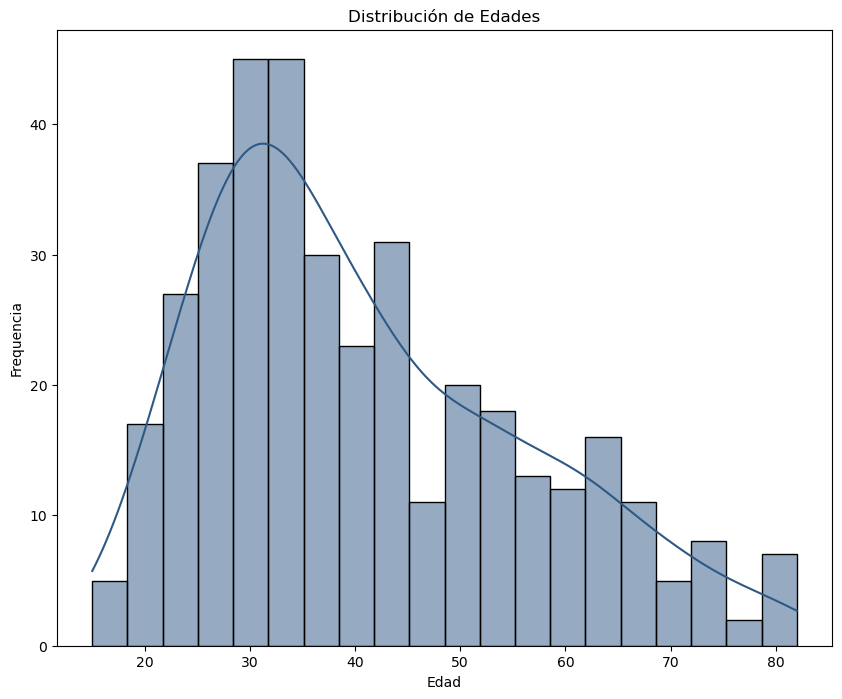

In [1118]:
#Edades
plt.figure(figsize=(10, 8))
sns.histplot(df['Age'], bins=20, kde=True, color='#2E5984')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.title('Distribución de Edades')
plt.show()

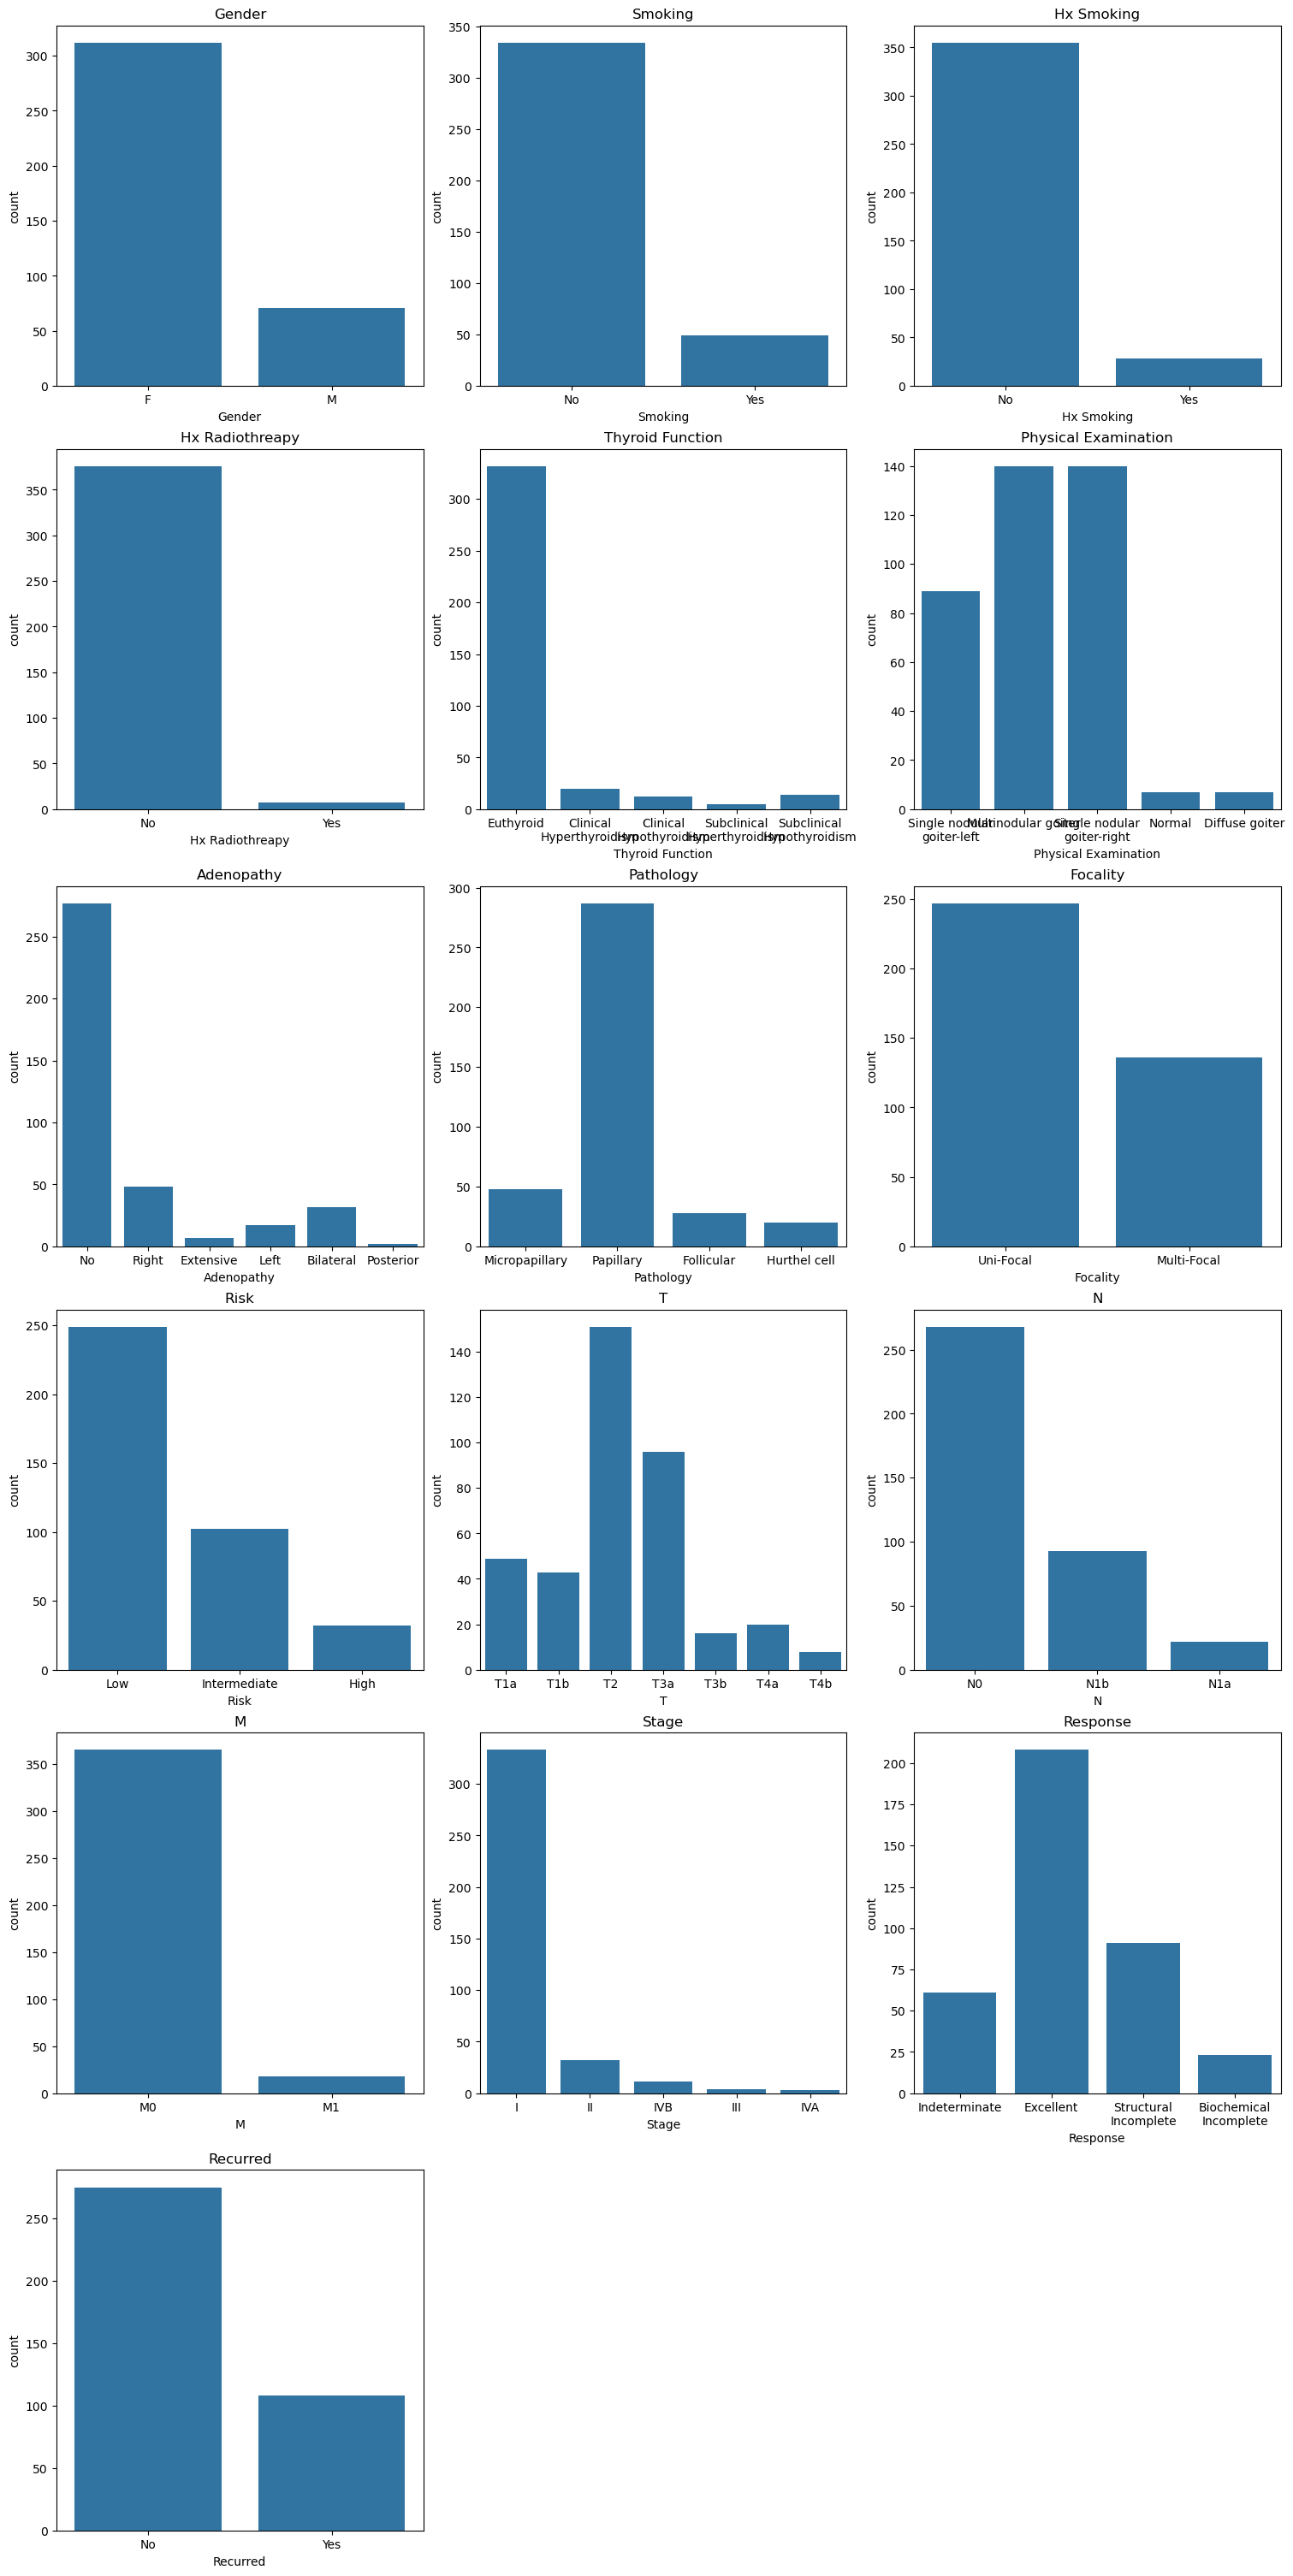

In [1119]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Selecciona categóricas con pocas categorías
categoricas = df.select_dtypes(include='object').columns
cols = [col for col in categoricas if df[col].nunique() < 10]

# Configura tamaño de la cuadrícula
n = len(cols)
n_cols = 3  # número de columnas en la malla
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, 
                         figsize=(n_cols * 5, n_rows * 5),
                         constrained_layout=True)

axes = axes.flatten()

for ax, col in zip(axes, cols):
    # Cuenta los valores y dibuja el countplot
    sns.countplot(x=col, data=df, ax=ax)
    
    # Prepara las etiquetas envueltas
    original_labels = [t.get_text() for t in ax.get_xticklabels()]
    wrapped = [
        "\n".join(textwrap.wrap(lbl, width=20))
        for lbl in original_labels
    ]
    
    # Fija primero las posiciones de los ticks
    ax.set_xticks(range(len(wrapped)))
    # Luego actualiza las etiquetas
    ax.set_xticklabels(wrapped, rotation=0, ha='center')
    
    ax.set_title(col)

# Elimina ejes sobrantes si los hay
for ax in axes[len(cols):]:
    fig.delaxes(ax)

plt.show()


Label Encoder

In [1120]:
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

Matriz de Correlacion

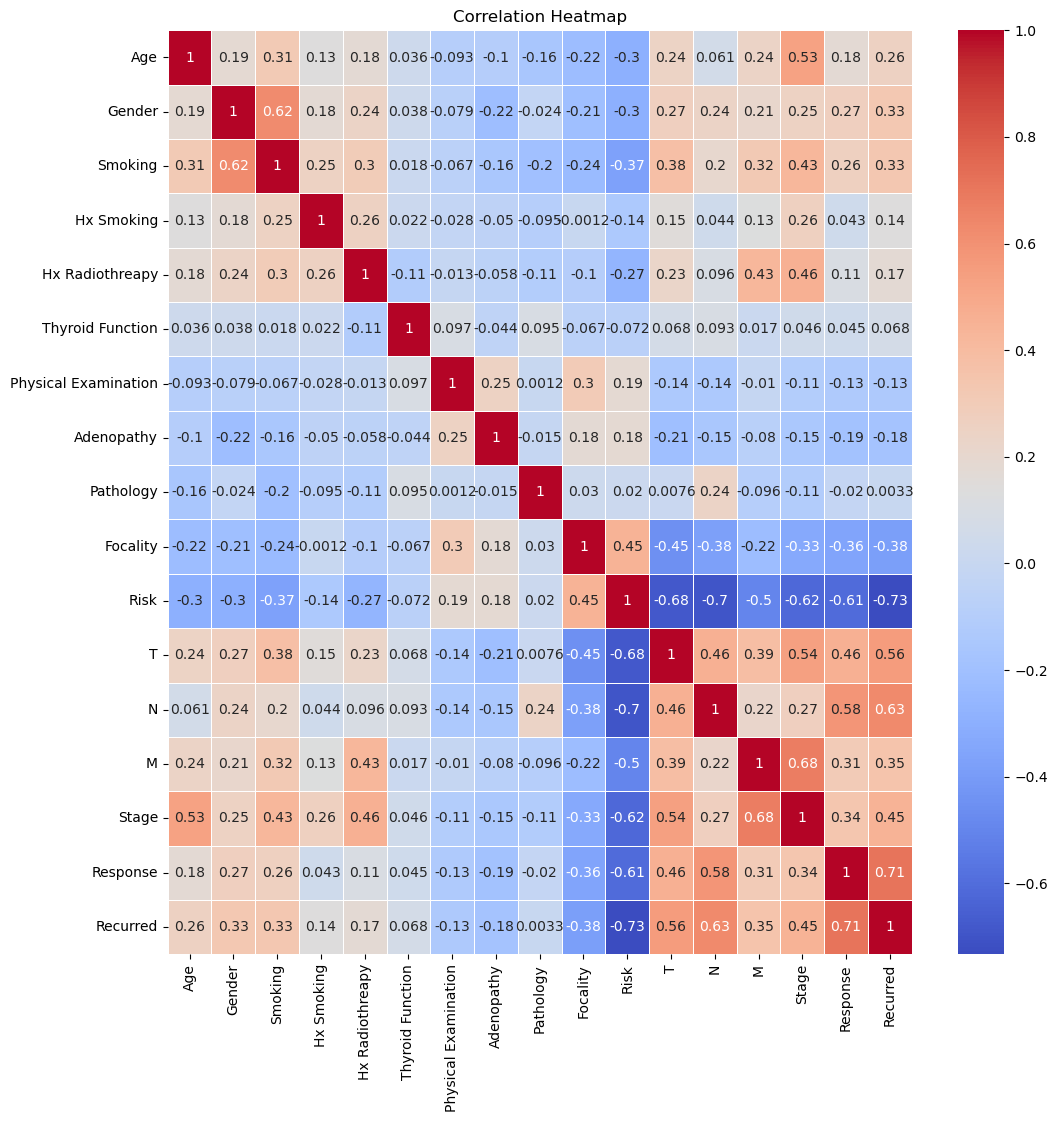

In [1121]:
correlation_matrix = df.corr()

#Heatmap con Seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Separacion de Target y Features


In [1122]:
#%% Dividir en Target y Features
X = df.drop('Recurred', axis=1)
y = df['Recurred']

Balanceo

In [1123]:
# Balanceo con SMOTE
smote = SMOTE(sampling_strategy="minority", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,43,0,0,0,0,2,4,5,3,0,0,3,2,0,0,3
546,62,1,0,0,0,2,4,4,3,0,1,2,1,0,0,3
547,35,0,0,0,0,2,3,2,3,0,0,3,2,0,0,2
548,52,0,0,0,0,2,1,5,1,0,0,4,1,0,0,1


## **Modelado**

### Modelo de Regresión Logística

Modelo 1: Modelo de Regresión Logística sin Balanceo

In [1124]:
#%% Dividir en Target y Features
X1 = df.drop('Recurred', axis=1)
y1 = df['Recurred']

In [1125]:
#%% Division Train Test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

#%% Escalado de datos
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

In [1126]:
# Modelo de regresión logística con scikit-learn
start = time.time()

modelo_1 = LogisticRegression(max_iter=1000)
modelo_1.fit(X_train_1, y_train_1)
y_pred_1 = modelo_1.predict(X_test_1)
y_prob_1 = modelo_1.predict_proba(X_test_1)[:, 1]

end = time.time()
execution_time_1 = end - start

Modelo 2: Modelo de Regresión Logística con Balanceo

In [1127]:
#%% Dividir en Target y Features
X2 = X_resampled
y2 = y_resampled

In [1128]:
#%% Division Train Test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

#%% Escalado de datos
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [1129]:
# Modelo de regresión logística con scikit-learn
start = time.time()

modelo_2 = LogisticRegression(max_iter=1000)
modelo_2.fit(X_train_2, y_train_2)
y_pred_2 = modelo_2.predict(X_test_2)
y_prob_2 = modelo_2.predict_proba(X_test_2)[:, 1]

end = time.time()
execution_time_2 = end - start

### Modelo + Feature Selection


In [1130]:
#%% 3. Método de Envoltura: Forward Selection (Selección hacia adelante)
def forward_selection_regression(X, y, significance_level=0.05):
    selected_features = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        pvals = pd.Series(index=remaining_features, dtype=float)
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_with_const = sm.add_constant(X[features_to_test])
            model = sm.OLS(y, X_with_const).fit()
            pvals[feature] = model.pvalues[feature]
        min_pval = pvals.min()
        if min_pval < significance_level:
            best_feature = pvals.idxmin()
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features

selected_forward = forward_selection_regression(X, y, significance_level=0.05)
print("\n[Envoltura - Forward] Variables seleccionadas:", selected_forward)


[Envoltura - Forward] Variables seleccionadas: ['Risk', 'Response', 'N', 'Gender']


In [1131]:
#%% 4. Método de Envoltura: Backward Elimination (Eliminación hacia atrás)
def backward_elimination_regression(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_with_const = sm.add_constant(X[features])
        model = sm.OLS(y, X_with_const).fit()
        # Excluir la constante al evaluar los p-valores
        pvalues = model.pvalues.iloc[1:]
        max_pval = pvalues.max()
        if max_pval > significance_level:
            worst_feature = pvalues.idxmax()
            features.remove(worst_feature)
        else:
            break
    return features

selected_backward = backward_elimination_regression(X, y, significance_level=0.05)
print("\n[Envoltura - Backward] Variables seleccionadas:", selected_backward)



[Envoltura - Backward] Variables seleccionadas: ['Gender', 'Risk', 'N', 'Response']


In [1132]:
#%% 5. Método de Envoltura: Stepwise Selection (Selección por pasos bidireccional)
def stepwise_selection_regression(X, y, significance_level_in=0.05, significance_level_out=0.05):
    included = []
    while True:
        changed = False
        
        # Paso de incorporación
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)
        for new_feature in excluded:
            X_with_const = sm.add_constant(pd.DataFrame(X[included + [new_feature]]))
            model = sm.OLS(y, X_with_const).fit()
            new_pvals[new_feature] = model.pvalues[new_feature]
        if not new_pvals.empty:
            best_feature = new_pvals.idxmin()
            if new_pvals[best_feature] < significance_level_in:
                included.append(best_feature)
                changed = True
        
        # Paso de eliminación
        if included:
            X_with_const = sm.add_constant(pd.DataFrame(X[included]))
            model = sm.OLS(y, X_with_const).fit()
            pvalues = model.pvalues.iloc[1:]
            worst_feature = pvalues.idxmax()
            if pvalues[worst_feature] > significance_level_out:
                included.remove(worst_feature)
                changed = True
        
        if not changed:
            break
    return included

selected_stepwise = stepwise_selection_regression(X, y, significance_level_in=0.05, significance_level_out=0.05)
print("\n[Envoltura - Stepwise] Variables seleccionadas:", selected_stepwise)


[Envoltura - Stepwise] Variables seleccionadas: ['Risk', 'Response', 'N', 'Gender']


Modelo 3: Modelo de Regresión logística con Feature Selection

In [1133]:
#%% Dividir en Target y Features
X3 = X_resampled[selected_forward]
y3 = y_resampled

In [1134]:
#%% Division Train Test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

#%% Escalado de datos
scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

In [1135]:
# Modelo Logistic Regression con las variables de selected forward
start = time.time()

modelo_3 = LogisticRegression(max_iter=1000)
modelo_3.fit(X_train_3, y_train_3)
y_pred_3 = modelo_3.predict(X_test_3)
y_prob_3 = modelo_3.predict_proba(X_test_3)[:, 1]

end = time.time()
execution_time_3 = end - start

### Modelo + PCA

Modelo 4: Modelo de Regresión logística + PCA sin Escalamiento

In [1136]:
# Performing PCA
n = 16
pca = PCA(n_components=n)
pca.fit(X)
X_pca = pca.transform(X)

print("Tamaño original:", X.shape)
print(f"Tamaño PCA:", X_pca.shape)

Tamaño original: (383, 16)
Tamaño PCA: (383, 16)


In [1137]:
#%% Validate the "recommended" PCA's
import numpy as np
w,v = np.linalg.eig(pca.get_covariance()) # Get vectors for covariance matrix
w=np.abs(w)
indx = np.argsort(w)[::-1] # sort
porcentaje = w[indx]/np.sum(w) # convert to %
porcent_acum = np.cumsum(porcentaje) # Accumulate
print(f'Valores propios: {w[indx]}') 
print(f'Porcentaje de varianza: {porcentaje}')
print(f'Porcentaje de varianza acumulada: {porcent_acum}')

Valores propios: [2.29477956e+02 2.99063347e+00 1.77547489e+00 1.12643619e+00
 8.60200419e-01 6.84478363e-01 3.81673240e-01 3.38882042e-01
 2.86431201e-01 1.69202250e-01 1.52850626e-01 8.32264960e-02
 5.87932662e-02 4.17106644e-02 2.14547251e-02 1.19440340e-02]
Porcentaje de varianza: [9.62327681e-01 1.25413762e-02 7.44554581e-03 4.72376844e-03
 3.60729496e-03 2.87039543e-03 1.60056648e-03 1.42111937e-03
 1.20116406e-03 7.09558387e-04 6.40987010e-04 3.49014617e-04
 2.46552603e-04 1.74915829e-04 8.99714999e-05 5.00879246e-05]
Porcentaje de varianza acumulada: [0.96232768 0.97486906 0.9823146  0.98703837 0.99064567 0.99351606
 0.99511663 0.99653775 0.99773891 0.99844847 0.99908946 0.99943847
 0.99968502 0.99985994 0.99994991 1.        ]


    Aqui peepee

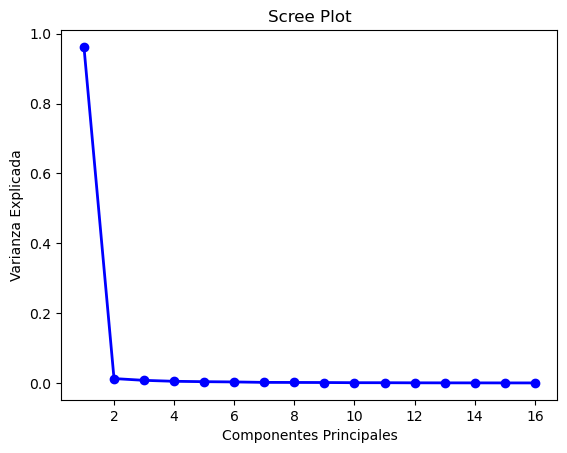

In [1138]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.show()

    Aqui peepee Creamos un pca con solo los primeros 2 componentes principales, que capturan la vaianza del 97.48 % de los datos.

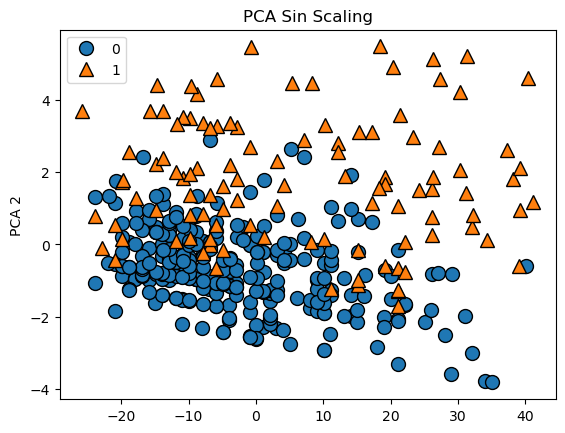

In [1139]:
#Plotear PCA con PC 1 y PC 2
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y)
plt.legend(np.unique(y), loc='best')
plt.ylabel('PCA 2')
plt.title('PCA Sin Scaling')
plt.show()

In [1140]:
#X4 Primeros dos componentes principales 
X4 = X_pca[:, :2]
X4 = pd.DataFrame(X4, columns=['PC1', 'PC2'])
print(X4.head())

         PC1       PC2
0 -13.915053 -1.392608
1  -6.913614 -1.230247
2 -10.937332 -2.199177
3  21.032739 -3.308722
4  21.065019 -2.071758


In [1141]:
#%% Division Train Test
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y, test_size=0.2, random_state=42)

In [1142]:
# Modelo Logistic Regression con PCA sin Escalamiento y 2 Componentes principales
start = time.time()

modelo_4 = LogisticRegression(max_iter=1000)
modelo_4.fit(X_train_4, y_train_4)
y_pred_4 = modelo_4.predict(X_test_4)
y_prob_4 = modelo_4.predict_proba(X_test_4)[:, 1]

end = time.time()
execution_time_4 = end - start

Modelo 5: Modelo de Regresión logística + PCA con Escalamiento

In [1143]:
# Performing PCA
n = 16
pca2 = PCA(n_components=n)
pca2.fit(X)
X_pca2 = pca2.transform(X)

#%%scalin
escala= StandardScaler()
escala.fit(X)
escalada=escala.transform(X)
pca2.fit(escalada)
X_pca_escalada=pca2.transform(escalada)

print("Tamaño original:", X.shape)
print(f"Tamaño PCA:", X_pca_escalada.shape)

Tamaño original: (383, 16)
Tamaño PCA: (383, 16)


In [1144]:
#%% Validate the "recommended" PCA's
import numpy as np
w,v = np.linalg.eig(pca2.get_covariance()) # Get vectors for covariance matrix
w=np.abs(w)
indx = np.argsort(w)[::-1] # sort
porcentaje = w[indx]/np.sum(w) # convert to %
porcent_acum = np.cumsum(porcentaje) # Accumulate
print(f'Valores propios: {w[indx]}') 
print(f'Porcentaje de varianza: {porcentaje}')
print(f'Porcentaje de varianza acumulada: {porcent_acum}')

Valores propios: [4.76358597 1.79732883 1.26847488 1.16501286 1.04184654 0.96139511
 0.84320885 0.78906107 0.72867959 0.59396246 0.5448936  0.46434901
 0.38316742 0.32169325 0.21066168 0.1645637 ]
Porcentaje de varianza: [0.29694678 0.11203975 0.07907268 0.07262319 0.06494539 0.05993031
 0.05256295 0.04918755 0.04542356 0.03702573 0.03396693 0.02894604
 0.02388544 0.02005333 0.01313198 0.01025838]
Porcentaje de varianza acumulada: [0.29694678 0.40898653 0.48805921 0.5606824  0.6256278  0.68555811
 0.73812106 0.78730861 0.83273218 0.86975791 0.90372484 0.93267088
 0.95655631 0.97660964 0.98974162 1.        ]


    Creamos un pca con solo los primeros 11 componentes principales, que capturan la vaianza del 90.37 % de los datos.

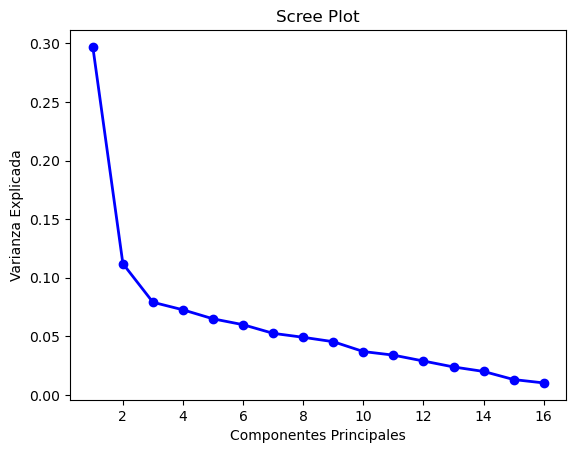

In [1145]:
PC_values = np.arange(pca2.n_components_) + 1
plt.plot(PC_values, pca2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.show()

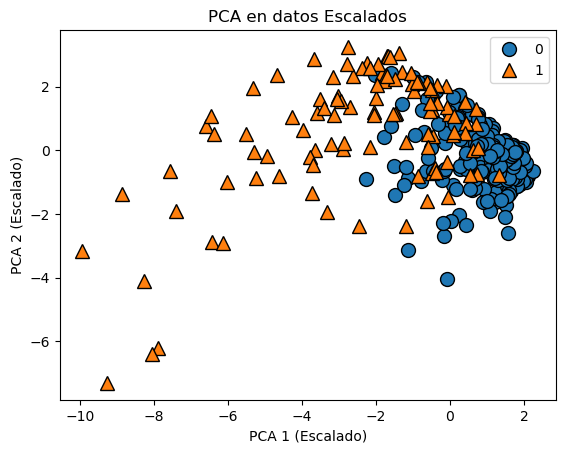

In [1146]:
#PLotear PCA escalado
mglearn.discrete_scatter(X_pca_escalada[:, 0], X_pca_escalada[:, 1], y)
plt.legend(np.unique(y), loc='best')
plt.xlabel('PCA 1 (Escalado)')
plt.ylabel('PCA 2 (Escalado)')
plt.title('PCA en datos Escalados')
plt.show()

In [1147]:
#X5 =Primeras 11 componentes principales 
X5 = X_pca_escalada[:, :11]
X5 = pd.DataFrame(X5, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
print(X5.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.743810 -0.325624  0.081939  0.004964 -0.094734 -0.435827 -0.060041   
1  1.316413 -1.603726 -0.991772  0.345717 -0.512093  1.903983  2.780503   
2  2.107116 -0.804334  0.406604  0.224809  0.096443 -0.322173 -0.315664   
3  1.652391 -1.289816  0.245966 -0.138814  1.079936 -0.200002 -0.482191   
4  0.860819 -0.400719 -1.333989 -1.352030  1.323462  0.280644  0.026916   

        PC8       PC9      PC10      PC11  
0 -1.004314 -0.036419  0.920737  0.357336  
1 -0.488710  0.056865  0.972708 -0.242538  
2 -0.805051 -0.000359  0.233141  0.324225  
3  0.148177  1.095902  0.405810  0.826820  
4  0.947779 -0.430813  0.459064  1.032378  


In [1148]:
#%% Division Train Test
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X5, y, test_size=0.2, random_state=42)

In [1149]:
# Modelo Logistic Regression con PCA con Escalamiento y 11 Componentes principales
start = time.time()

modelo_5 = LogisticRegression(max_iter=1000)
modelo_5.fit(X_train_5, y_train_5)
y_pred_5 = modelo_5.predict(X_test_5)
y_prob_5 = modelo_5.predict_proba(X_test_5)[:, 1]

end = time.time()
execution_time_5 = end - start

### Modelo + Feature Selection + PCA

In [1150]:
#Feature Selection Dataset
X6 = X[selected_forward]
y6 = y

In [1151]:
# Performing PCA
n = 4
pca3 = PCA(n_components=n)
pca3.fit(X6)
X_pca = pca3.transform(X6)

#%%scalin
escala= StandardScaler()
escala.fit(X6)
escalada=escala.transform(X6)
pca3.fit(escalada)
X_pca_escalada2=pca3.transform(escalada)

print("Tamaño original:", X6.shape)
print(f"Tamaño PCA:", X_pca_escalada2.shape)

Tamaño original: (383, 4)
Tamaño PCA: (383, 4)


In [1152]:
#%% Validate the "recommended" PCA's
import numpy as np
w,v = np.linalg.eig(pca3.get_covariance()) # Get vectors for covariance matrix
w=np.abs(w)
indx = np.argsort(w)[::-1] # sort
porcentaje = w[indx]/np.sum(w) # convert to %
porcent_acum = np.cumsum(porcentaje) # Accumulate
print(f'Valores propios: {w[indx]}') 
print(f'Porcentaje de varianza: {porcentaje}')
print(f'Porcentaje de varianza acumulada: {porcent_acum}')

Valores propios: [2.4190131  0.85174761 0.43920445 0.30050605]
Porcentaje de varianza: [0.60317428 0.21238093 0.10951442 0.07493036]
Porcentaje de varianza acumulada: [0.60317428 0.81555522 0.92506964 1.        ]


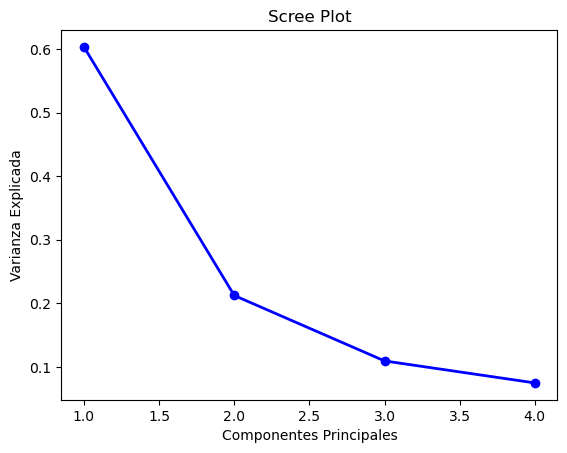

In [1153]:
PC_values = np.arange(pca3.n_components_) + 1
plt.plot(PC_values, pca3.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.show()

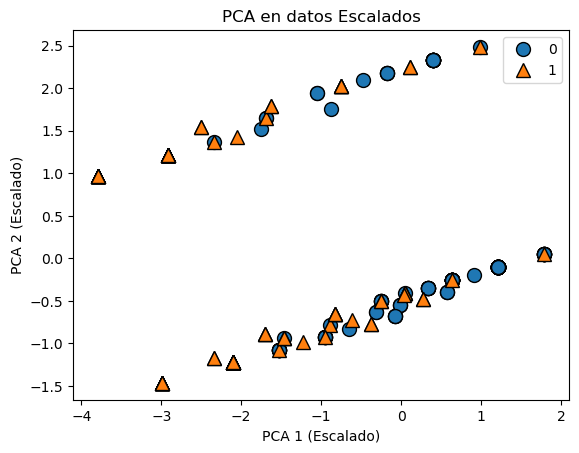

In [1154]:
#Plotear PCA escalado
mglearn.discrete_scatter(X_pca_escalada2[:, 0], X_pca_escalada2[:, 1], y6)
plt.legend(np.unique(y6), loc='best')
plt.xlabel('PCA 1 (Escalado)')
plt.ylabel('PCA 2 (Escalado)')
plt.title('PCA en datos Escalados')
plt.show()

In [1155]:
#X5 =Primeras 3 componentes principales 
X6 = X_pca_escalada[:, :3]
X6 = pd.DataFrame(X6, columns=['PC1', 'PC2', 'PC3'])
print(X6.head())

        PC1       PC2       PC3
0  1.743810 -0.325624  0.081939
1  1.316413 -1.603726 -0.991772
2  2.107116 -0.804334  0.406604
3  1.652391 -1.289816  0.245966
4  0.860819 -0.400719 -1.333989


In [1156]:
#%% Division Train Test
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X6, y6, test_size=0.2, random_state=42)

In [1157]:
# Modelo Logistic Regression con PCA con Escalamiento y 11 Componentes principales
start = time.time()

modelo_6 = LogisticRegression(max_iter=1000)
modelo_6.fit(X_train_6, y_train_6)
y_pred_6 = modelo_6.predict(X_test_6)
y_prob_6 = modelo_6.predict_proba(X_test_6)[:, 1]

end = time.time()
execution_time_6 = end - start

### Modelo + Clustering

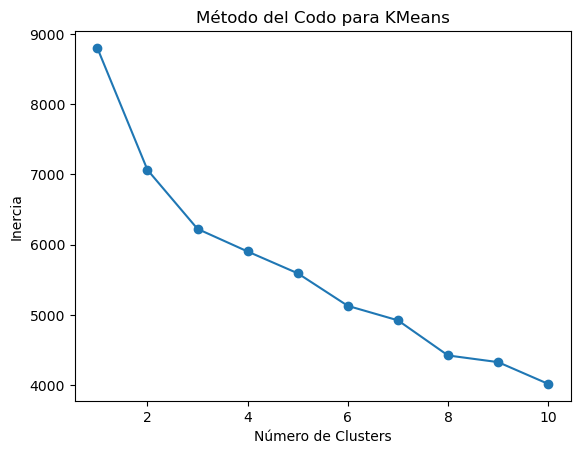

In [1158]:
#%% K-Means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Estandarizar las variables 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Encontrar el número óptimo de clusters con el método del codo 
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para KMeans')
plt.show()

# Ajustar el modelo KMeans con el número de clusters elegido 
kmeans_final = KMeans(n_clusters=6, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Agregar los clusters al DataFrame original 
X_resampled['Cluster'] = clusters


Modelo 7: Modelo de Regresión logística con Clustering

In [1159]:
#%% Dividir en Target y Features
X7 = X_resampled
y7 = y_resampled

In [1160]:
#%% Division Train Test
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X7, y7, test_size=0.2, random_state=42)

In [1161]:
# Modelo Logistic Regression con las variables de selected forward
start = time.time()

modelo_7 = LogisticRegression(max_iter=1000)
modelo_7.fit(X_train_7, y_train_7)
y_pred_7 = modelo_7.predict(X_test_7)
y_prob_7 = modelo_7.predict_proba(X_test_7)[:, 1]

end = time.time()
execution_time_7 = end - start

### Modelo + Clustering + Feature Selection

Modelo 8: Modelo de Regresión logística con Clustering y Feature Selection

In [1162]:
#%% Dividir en Target y Features
X8 = X_resampled[selected_forward + ['Cluster']]
y8 = y_resampled

In [1163]:
#%% Division Train Test
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X8, y8, test_size=0.2, random_state=42)

In [1164]:
# Modelo Logistic Regression con las variables de selected forward
start = time.time()

modelo_8 = LogisticRegression(max_iter=1000)
modelo_8.fit(X_train_8, y_train_8)
y_pred_8 = modelo_8.predict(X_test_8)
y_prob_8 = modelo_8.predict_proba(X_test_8)[:, 1]

end = time.time()
execution_time_8 = end - start

## **Validación**

### *Modelo de Regresión Logística sin Balanceo*

Exactitud (Accuracy): 0.9351
Precisión (Precision): 0.9375
Sensibilidad (Recall): 0.7895
F1-Score: 0.8571
AUC-ROC: 0.9347
Cross Validation Score: <built-in method mean of numpy.ndarray object at 0x000001E0ABBC82D0>
Tiempo de ejecución: 0.0067 segundos


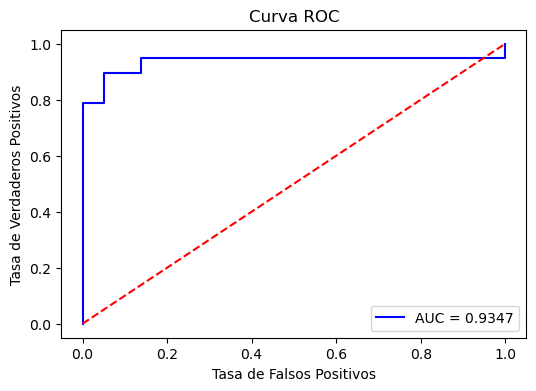

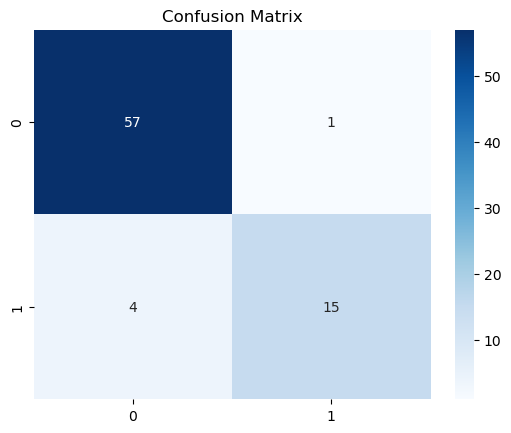

In [1165]:
#%% Evaluación del Modelo
print(f"Exactitud (Accuracy): {accuracy_score(y_test_1, y_pred_1):.4f}")
print(f"Precisión (Precision): {precision_score(y_test_1, y_pred_1):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test_1, y_pred_1):.4f}")
print(f"F1-Score: {f1_score(y_test_1, y_pred_1):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test_1, y_prob_1):.4f}")
print(f"Cross Validation Score: {cross_val_score(modelo_1, X, y, cv=15).mean}")
print(f"Tiempo de ejecución: {execution_time_1:.4f} segundos")

#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test_1, y_prob_1)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test_1, y_prob_1):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#%% Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_1, y_pred_1), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


### *Modelo de Regresión Logística con Balanceo*


Evaluación del Modelo con Variables Seleccionadas por Forward Selection:
Exactitud (Accuracy): 0.9364
Precisión (Precision): 0.8929
Sensibilidad (Recall): 0.9804
F1-Score: 0.9346
AUC-ROC: 0.9887
Cross Validation Score: <built-in method mean of numpy.ndarray object at 0x000001E0AE765A10>
Tiempo de ejecución: 0.0128 segundos


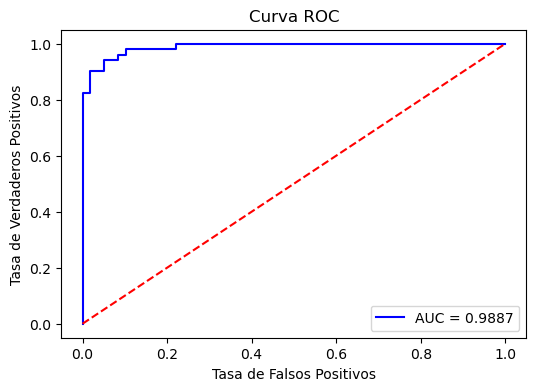

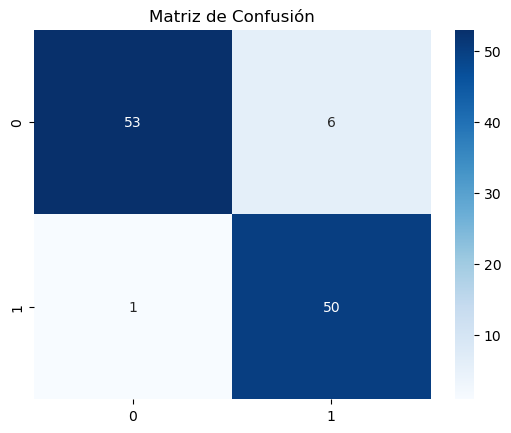

In [1166]:
#%% Evaluación del Modelo
print("\nEvaluación del Modelo con Variables Seleccionadas por Forward Selection:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test_2, y_pred_2):.4f}")
print(f"Precisión (Precision): {precision_score(y_test_2, y_pred_2):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test_2, y_pred_2):.4f}")
print(f"F1-Score: {f1_score(y_test_2, y_pred_2):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test_2, y_prob_2):.4f}")
print(f"Cross Validation Score: {cross_val_score(modelo_2, X2, y2, cv=15).mean}")
print(f"Tiempo de ejecución: {execution_time_2:.4f} segundos")

#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test_2, y_prob_2)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test_2, y_prob_2):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#%% Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_2, y_pred_2), annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.show()


### *Modelo de Regresión Logística + Feature Selection*


Evaluación del Modelo con Variables Seleccionadas por Forward Selection:
Exactitud (Accuracy): 0.8909
Precisión (Precision): 0.8305
Sensibilidad (Recall): 0.9608
F1-Score: 0.8909
AUC-ROC: 0.9889
Cross Validation Score: <built-in method mean of numpy.ndarray object at 0x000001E0AF0F0150>
Tiempo de ejecución: 0.0094 segundos


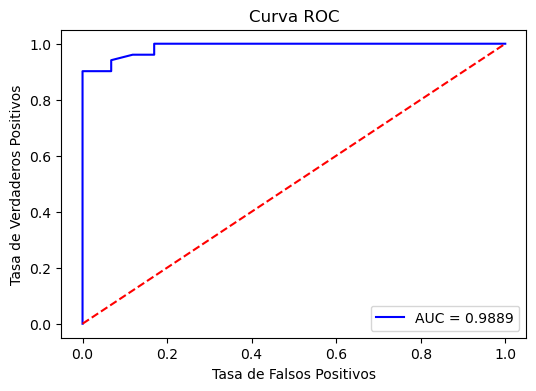

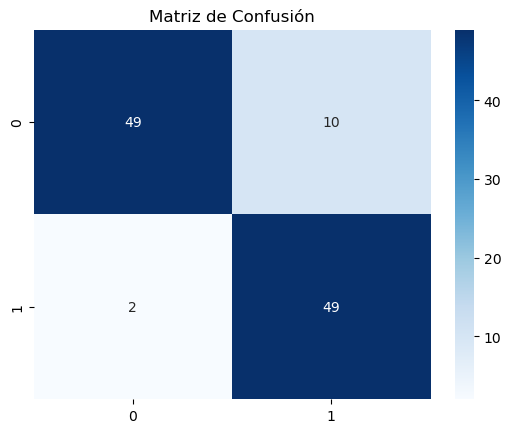

In [1167]:
#%% Evaluación del Modelo
print("\nEvaluación del Modelo con Variables Seleccionadas por Forward Selection:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test_3, y_pred_3):.4f}")
print(f"Precisión (Precision): {precision_score(y_test_3, y_pred_3):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test_3, y_pred_3):.4f}")
print(f"F1-Score: {f1_score(y_test_3, y_pred_3):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test_3, y_prob_3):.4f}")
print(f"Cross Validation Score: {cross_val_score(modelo_3, X3, y3, cv=15).mean}")
print(f"Tiempo de ejecución: {execution_time_3:.4f} segundos")

#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test_3, y_prob_3)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test_3, y_prob_3):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#%% Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_3, y_pred_3), annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.show()

### *Modelo Regresión Logística + PCA Sin Escalamiento*


Evaluación del Modelo con Variables Seleccionadas por Forward Selection:
Exactitud (Accuracy): 0.8961
Precisión (Precision): 0.9231
Sensibilidad (Recall): 0.6316
F1-Score: 0.7500
AUC-ROC: 0.9056
Cross Validation Score: <built-in method mean of numpy.ndarray object at 0x000001E0A8CF6610>
Tiempo de ejecución: 0.0206 segundos


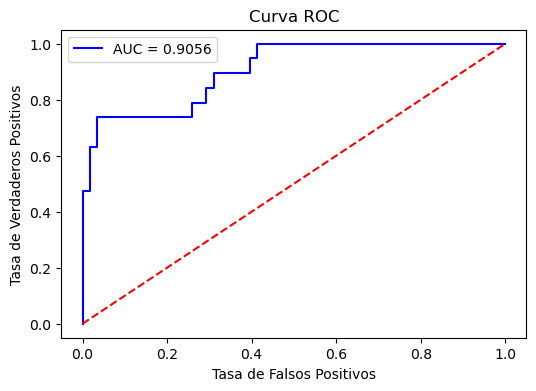

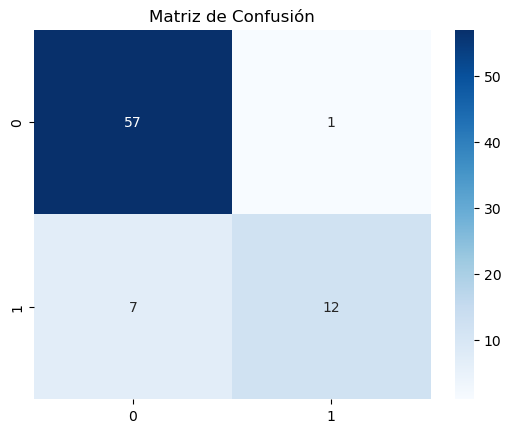

In [1168]:
#%% Evaluación del Modelo 5
print("\nEvaluación del Modelo con Variables Seleccionadas por Forward Selection:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test_4, y_pred_4):.4f}")
print(f"Precisión (Precision): {precision_score(y_test_4, y_pred_4):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test_4, y_pred_4):.4f}")
print(f"F1-Score: {f1_score(y_test_4, y_pred_4):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test_4, y_prob_4):.4f}")
print(f"Cross Validation Score: {cross_val_score(modelo_4, X4, y, cv=15).mean}")
print(f"Tiempo de ejecución: {execution_time_4:.4f} segundos")

#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test_4, y_prob_4)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test_4, y_prob_4):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#%% Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_4, y_pred_4), annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.show()


### *Modelo Regresión Logística + PCA Con Escalamiento*


Evaluación del Modelo con Variables Seleccionadas por Forward Selection:
Exactitud (Accuracy): 0.9221
Precisión (Precision): 0.8824
Sensibilidad (Recall): 0.7895
F1-Score: 0.8333
AUC-ROC: 0.9383
Cross Validation Score: <built-in method mean of numpy.ndarray object at 0x000001E0AE415530>
Tiempo de ejecución: 0.0231 segundos


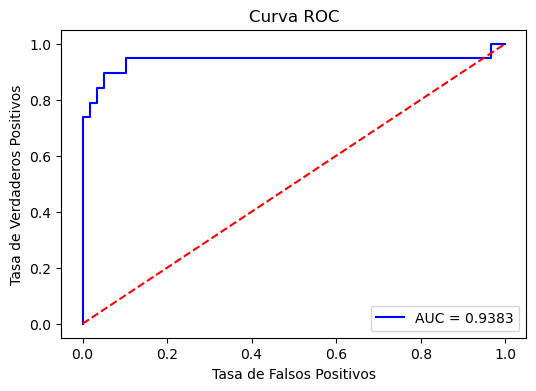

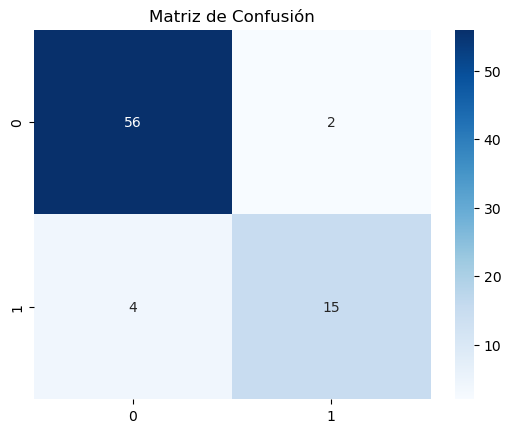

In [1169]:
#%% Evaluación del Modelo 5
print("\nEvaluación del Modelo con Variables Seleccionadas por Forward Selection:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test_5, y_pred_5):.4f}")
print(f"Precisión (Precision): {precision_score(y_test_5, y_pred_5):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test_5, y_pred_5):.4f}")
print(f"F1-Score: {f1_score(y_test_5, y_pred_5):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test_5, y_prob_5):.4f}")
print(f"Cross Validation Score: {cross_val_score(modelo_5, X5, y, cv=15).mean}")
print(f"Tiempo de ejecución: {execution_time_5:.4f} segundos")

#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test_5, y_prob_5)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test_5, y_prob_5):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#%% Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_5, y_pred_5), annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.show()

### *Modelo Regresión Logística + Feature Selection + PCA*


Evaluación del Modelo con Variables Seleccionadas por Forward Selection:
Exactitud (Accuracy): 0.9221
Precisión (Precision): 1.0000
Sensibilidad (Recall): 0.6842
F1-Score: 0.8125
AUC-ROC: 0.9356
Cross Validation Score: <built-in method mean of numpy.ndarray object at 0x000001E0AF058F30>
Tiempo de ejecución: 0.0239 segundos


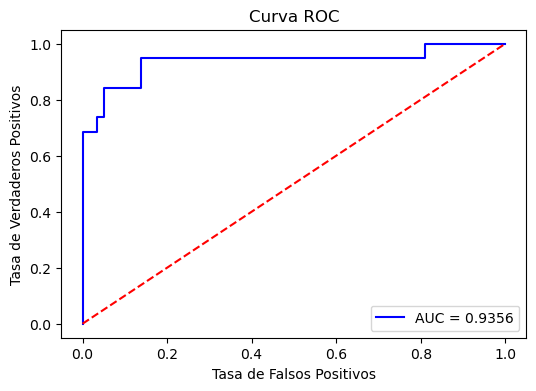

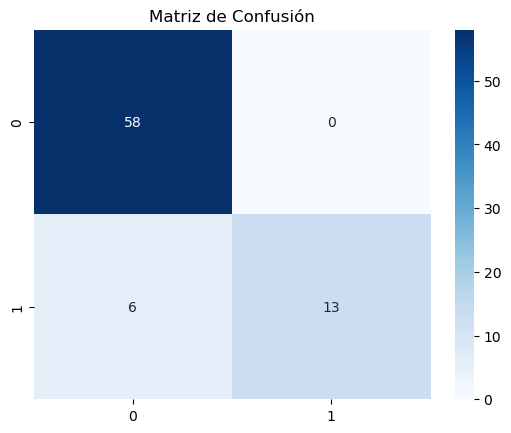

In [1170]:
#%% Evaluación del Modelo 5
print("\nEvaluación del Modelo con Variables Seleccionadas por Forward Selection:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test_6, y_pred_6):.4f}")
print(f"Precisión (Precision): {precision_score(y_test_6, y_pred_6):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test_6, y_pred_6):.4f}")
print(f"F1-Score: {f1_score(y_test_6, y_pred_6):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test_6, y_prob_6):.4f}")
print(f"Cross Validation Score: {cross_val_score(modelo_6, X6, y6, cv=15).mean}")
print(f"Tiempo de ejecución: {execution_time_6:.4f} segundos")

#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test_6, y_prob_6)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test_6, y_prob_6):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#%% Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_6, y_pred_6), annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.show()

### *Modelo Regresión Logística + Clustering*


Evaluación del Modelo con Variables Seleccionadas por Forward Selection:
Exactitud (Accuracy): 0.9273
Precisión (Precision): 0.8909
Sensibilidad (Recall): 0.9608
F1-Score: 0.9245
AUC-ROC: 0.9884
Cross Validation Score: <built-in method mean of numpy.ndarray object at 0x000001E0ACB92C70>
Tiempo de ejecución: 0.1011 segundos


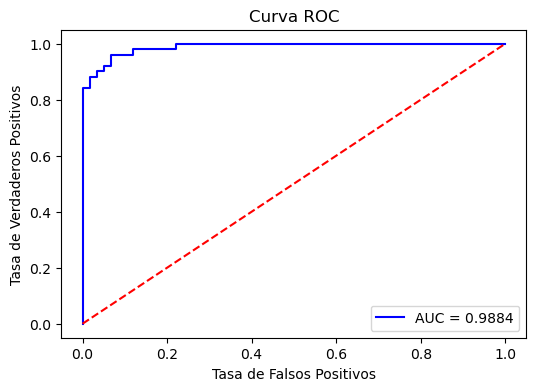

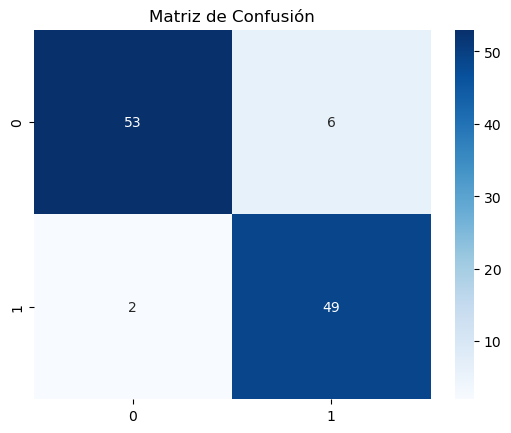

In [1171]:
#%% Evaluación del Modelo
print("\nEvaluación del Modelo con Variables Seleccionadas por Forward Selection:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test_7, y_pred_7):.4f}")
print(f"Precisión (Precision): {precision_score(y_test_7, y_pred_7):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test_7, y_pred_7):.4f}")
print(f"F1-Score: {f1_score(y_test_7, y_pred_7):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test_7, y_prob_7):.4f}")
print(f"Cross Validation Score: {cross_val_score(modelo_7, X7, y7, cv=15).mean}")
print(f"Tiempo de ejecución: {execution_time_7:.4f} segundos")

#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test_7, y_prob_7)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test_7, y_prob_7):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#%% Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_7, y_pred_7), annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.show()

### *Modelo Regresión Logística + Clustering + Feature Selection*


Evaluación del Modelo con Variables Seleccionadas por Forward Selection:
Exactitud (Accuracy): 0.9182
Precisión (Precision): 0.8750
Sensibilidad (Recall): 0.9608
F1-Score: 0.9159
AUC-ROC: 0.9899
Cross Validation Score: <built-in method mean of numpy.ndarray object at 0x000001E0A8FFBF90>
Tiempo de ejecución: 0.0158 segundos


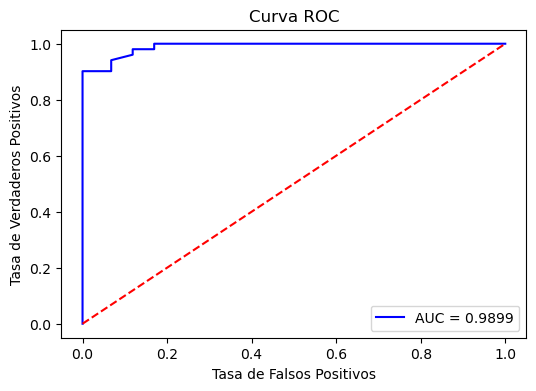

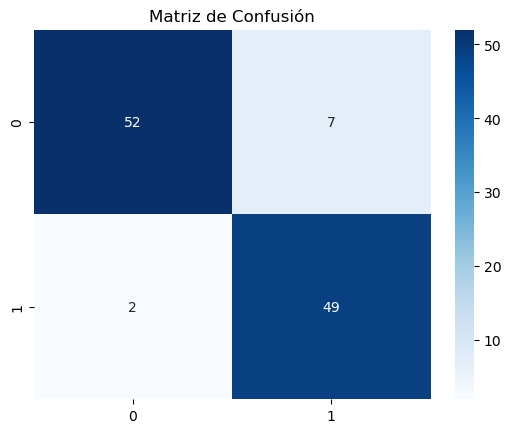

In [1172]:
#%% Evaluación del Modelo
print("\nEvaluación del Modelo con Variables Seleccionadas por Forward Selection:")
print(f"Exactitud (Accuracy): {accuracy_score(y_test_8, y_pred_8):.4f}")
print(f"Precisión (Precision): {precision_score(y_test_8, y_pred_8):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test_8, y_pred_8):.4f}")
print(f"F1-Score: {f1_score(y_test_8, y_pred_8):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test_8, y_prob_8):.4f}")
print(f"Cross Validation Score: {cross_val_score(modelo_8, X8, y8, cv=15).mean}")
print(f"Tiempo de ejecución: {execution_time_8:.4f} segundos")

#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test_8, y_prob_8)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test_8, y_prob_8):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#%% Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_8, y_pred_8), annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.show()

## **Visualización y Reporte**